<font size = "5"> **Chapter 3: [Introduction](../index.md/CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Homework 3

<font size = "5"> Reading Microscopy Data</font>

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework03.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Homework/Homework03.ipynb)
    
part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2025
<br>
Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load Packages

First we need to load the libraries we want to use. 
Here we use:
- numpy: numerical library
- matplotlib: graphic library
- pyTEMlib: TEM microsocpy library

All of those packages except pyTEMlib are provided by annaconda.
### Check Installed Packages

In [ ]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2025.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

### Load the plotting and pyTEMlib packages

Google Colab: Make sure to restart the Session (Crtl-M)

In [1]:
%matplotlib  widget
import matplotlib.pylab as plt
import numpy as np
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library


# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__='CH1_04-Reading_File'
__notebook_version__='2025_03_09'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
pyTEM version:  0.2024.09.0


## Open a file 

This function opens a hfd5 file in the pyNSID style which enables you to keep track of your data analysis.

Please see the **[Installation](CH1_02-Prerequisites.ipynb#TEM-Library)** notebook for installation.


Please note that the plotting routine of ``matplotlib`` was introduced in **[Matplotlib and Numpy for Micrographs](CH1_03-Data_Representation.ipynb)** notebook.

In the first lab we used a sample with a carbon grid of a periodicity of 500 nm

If you run this notebook on your own computer you should download your images from the [google drive for 2025 Lab Data](https://drive.google.com/drive/folders/1jZKyvi9r9gUcF5XD-D69MX5foZKHi3yN?usp=drive_link), if you run it on google colab you can go to the drive directory in the dialog below. 

In any case:

> You must log into Google with your UTK account to be able to read these data.
>

Go to the folder of your data and select a file

In [2]:
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
fileWidget = ft.FileWidget()

Now we plot that file


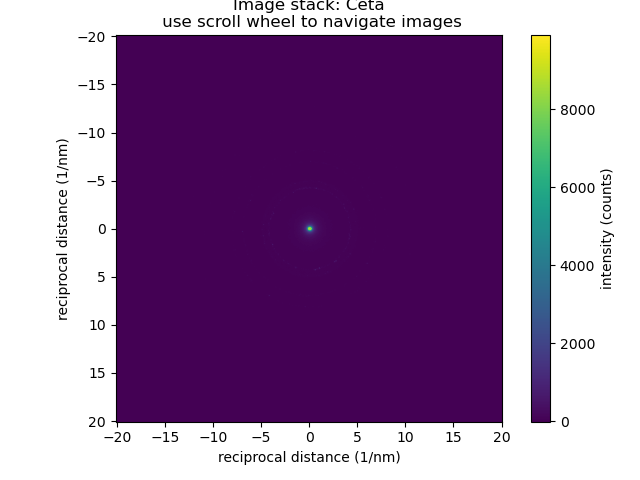

In [4]:
main_dataset = fileWidget.selected_dataset
v = main_dataset.plot()

## Determination of Magnification  

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

NameError: name 'main_dataset' is not defined

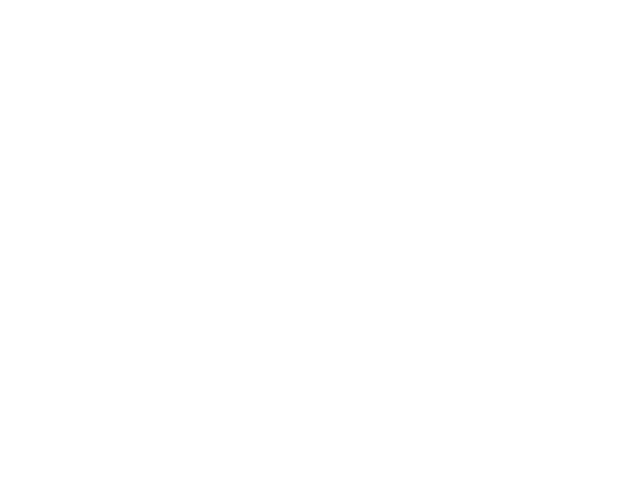

In [3]:
fig = plt.figure()

plt.imshow(main_dataset.T)
plt.title(main_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line 

In [ ]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')
print(f"indicated pixel size: {main_dataset.x[1]-main_dataset.x[0]:.2f} nm")

## Second Image

In [ ]:
second_fileWidget = ft.FileWidget()

In [ ]:
second_dataset = second_fileWidget.selected_dataset
view = second_dataset.plot()

## Determination of Magnification of Image 2

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

In [ ]:
fig = plt.figure()

plt.imshow(second_dataset.T)
plt.title(second_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line of Image 2

In [ ]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')
print(f"indicated pixel size: {second_dataset.x[1]-second_dataset.x[0]:.2f} nm")

## Question

- What are the measured pixel sizes in the two images
- What is the relative change in magnification with respect to pixel and with respect to indicated Magnification

- What is the relative rotation